In [ ]:
"""
Purpose: To read in all of the saved off validation dataframes and
display the score

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 08:54:44,000 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:54:44,001 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:54:44,001 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:54:44,005 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 08:54:44,005 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:54:44,015 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 08:54:44,395 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:54:44,398 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:54:44,399 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:54:44,399 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:54:44,400 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:54:44,401 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:54:44,402 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:54:44,404 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:54:44,829 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 08:54:47,239 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 08:54:47,240 - settings - Setting database.user to celiib
INFO - 2021-04-24 08:54:47,241 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 08:54:47,244 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 08:54:47,762 - settings - Setting enable_python_native_blobs to True


In [10]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
from pathlib import Path
import pandas_utils as pu

# Displaying he score

In [ ]:
"""
Purpose: To read in all of the validation dataframes,
concatenate and then display the overall scores and then the individual scores

Pseudocode:
1) Get the filenames in the validation direction
2) For each filename load up the dataframe
3) concatenate the dataframes into one
4) Display the score

in lower box
5) For each dataframe collected, display the score for the segment_id
"""

In [35]:
val_df_files

[PosixPath('validation_data/864691135925564174_validation_df.pbz2'),
 PosixPath('validation_data/864691136333790899_validation_df.pbz2'),
 PosixPath('validation_data/.ipynb_checkpoints'),
 PosixPath('validation_data/864691135740225387_validation_df.pbz2'),
 PosixPath('validation_data/864691135564655959_validation_df.pbz2'),
 PosixPath('validation_data/864691136175008774_validation_df.pbz2'),
 PosixPath('validation_data/864691136618412685_validation_df.pbz2'),
 PosixPath('validation_data/864691135589907979_validation_df.pbz2'),
 PosixPath('validation_data/864691135382947307_validation_df.pbz2'),
 PosixPath('validation_data/864691136545546146_validation_df.pbz2'),
 PosixPath('validation_data/864691136194103510_validation_df.pbz2'),
 PosixPath('validation_data/864691135212690816_validation_df.pbz2'),
 PosixPath('validation_data/864691135113167769_validation_df.pbz2'),
 PosixPath('validation_data/864691136311740477_validation_df.pbz2'),
 PosixPath('validation_data/864691136099807093_valida

52 Dataframes loaded
Segment Id = 864691135113167769
Postsyn counts:
TP:192266
TN:1120
FP:280
FN:3096
Presyn counts:
TP:1563
TN:8038
FP:383
FN:522


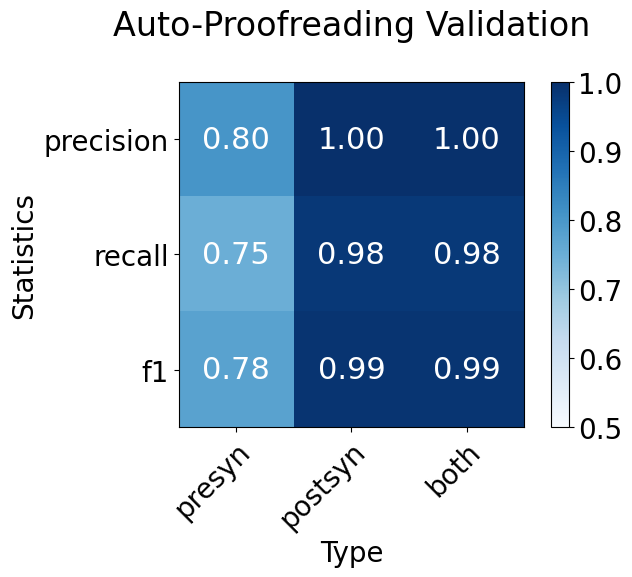

In [41]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./validation_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")


#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

Segment Id = 864691136370815112
Postsyn counts:
TP:3892
TN:0
FP:0
FN:64
Presyn counts:
TP:4
TN:3
FP:4
FN:3


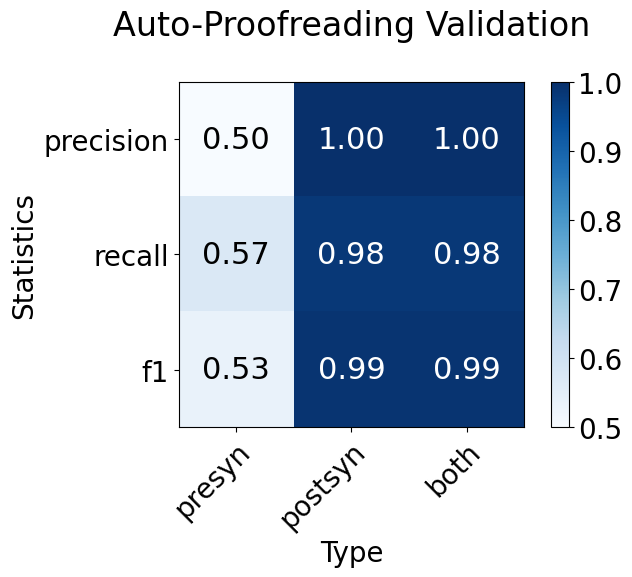

Segment Id = 864691135925564174
Postsyn counts:
TP:1591
TN:0
FP:1
FN:12
Presyn counts:
TP:7
TN:82
FP:1
FN:1


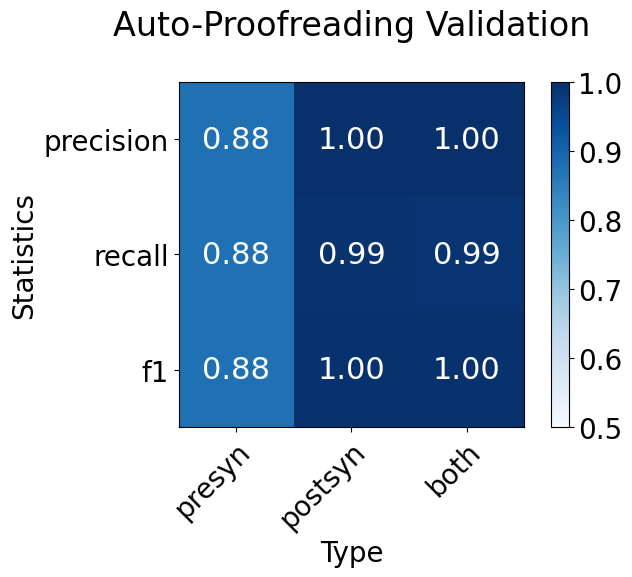

Segment Id = 864691136333790899
Postsyn counts:
TP:3788
TN:0
FP:1
FN:68
Presyn counts:
TP:72
TN:91
FP:25
FN:4


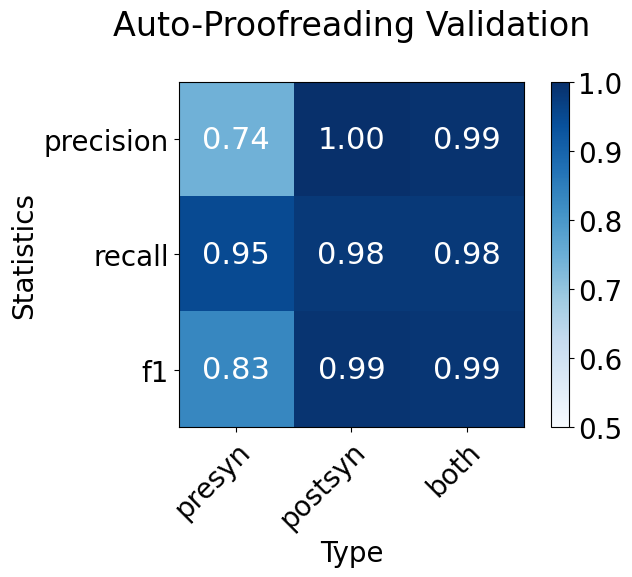

Segment Id = 864691135740225387
Postsyn counts:
TP:2006
TN:25
FP:3
FN:33
Presyn counts:
TP:7
TN:403
FP:0
FN:25


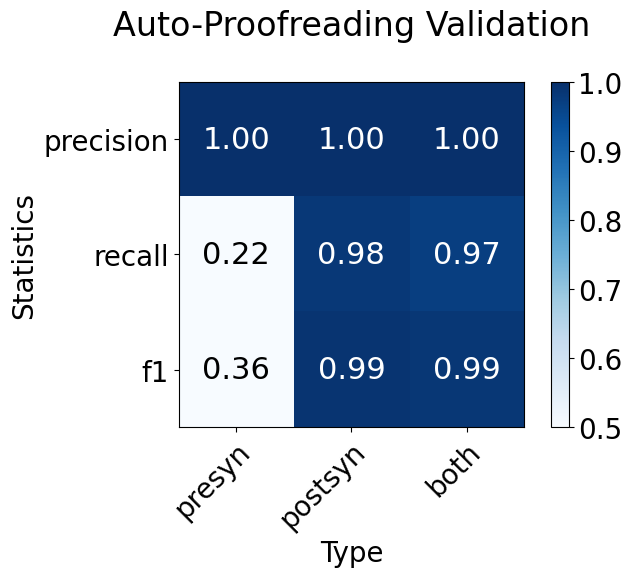

Segment Id = 864691136333776819
Postsyn counts:
TP:2024
TN:0
FP:4
FN:2
Presyn counts:
TP:7
TN:14
FP:0
FN:0


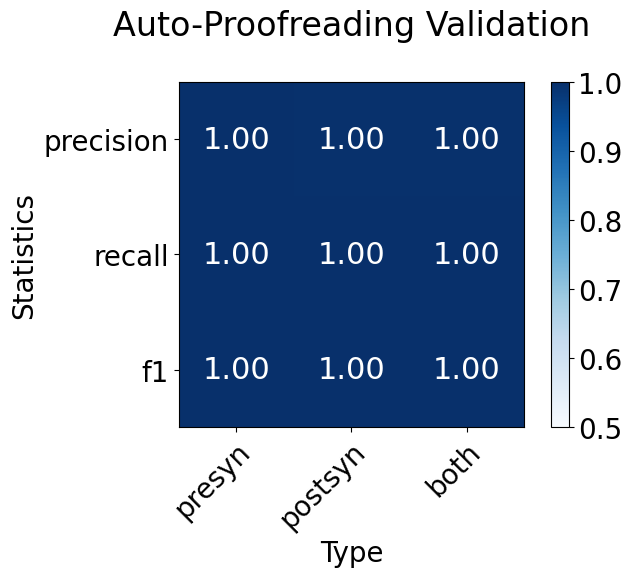

Segment Id = 864691135564655959
Postsyn counts:
TP:1124
TN:0
FP:0
FN:9
Presyn counts:
TP:6
TN:69
FP:0
FN:5


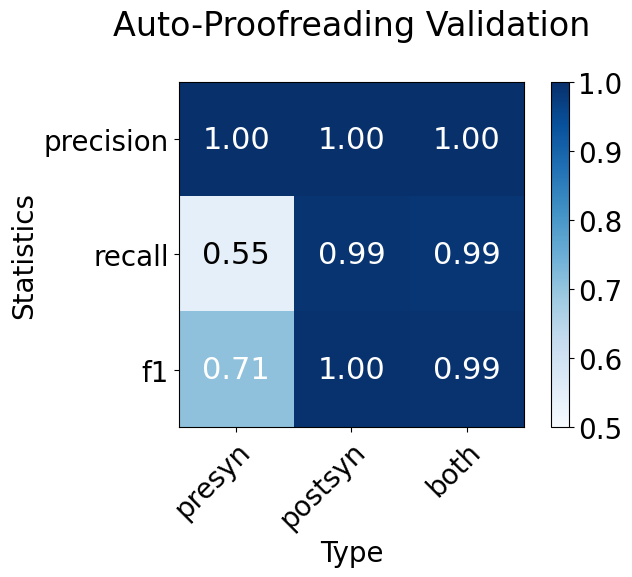

Segment Id = 864691135272164113
Postsyn counts:
TP:5629
TN:2
FP:14
FN:20
Presyn counts:
TP:0
TN:153
FP:0
FN:31


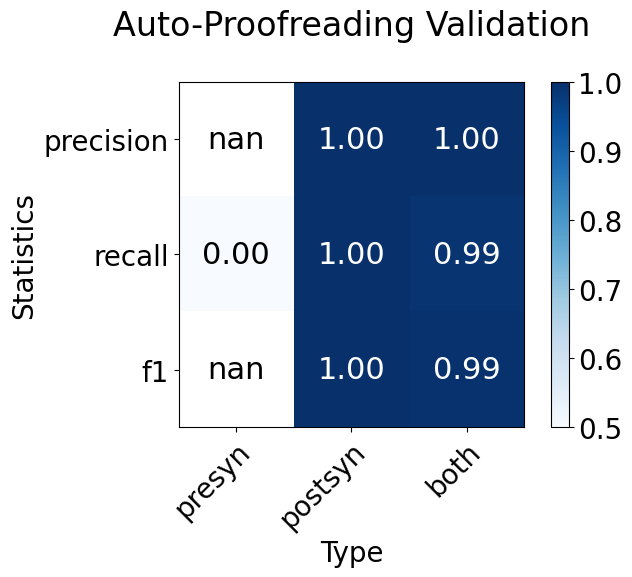

Segment Id = 864691136105498585
Postsyn counts:
TP:805
TN:0
FP:7
FN:66
Presyn counts:
TP:210
TN:0
FP:4
FN:25


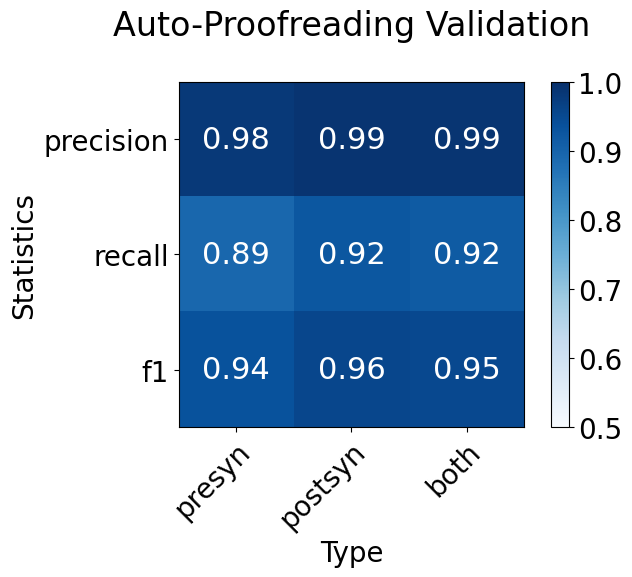

Segment Id = 864691136175008774
Postsyn counts:
TP:2238
TN:4
FP:2
FN:244
Presyn counts:
TP:105
TN:145
FP:15
FN:0


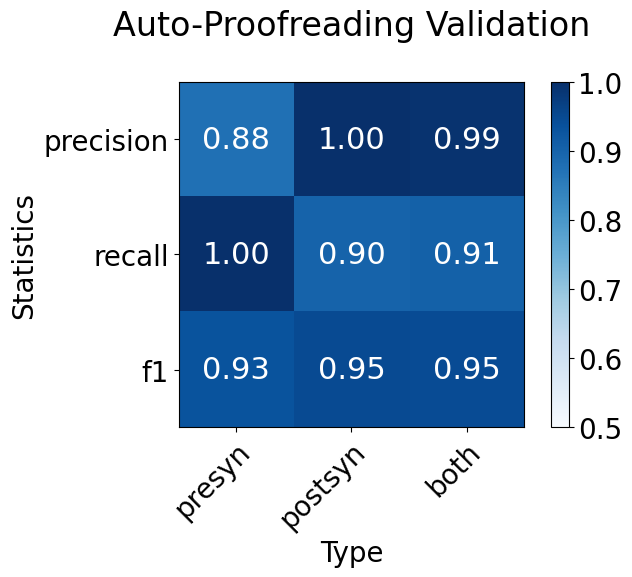

Segment Id = 864691136618412685
Postsyn counts:
TP:1754
TN:0
FP:2
FN:9
Presyn counts:
TP:23
TN:95
FP:4
FN:0


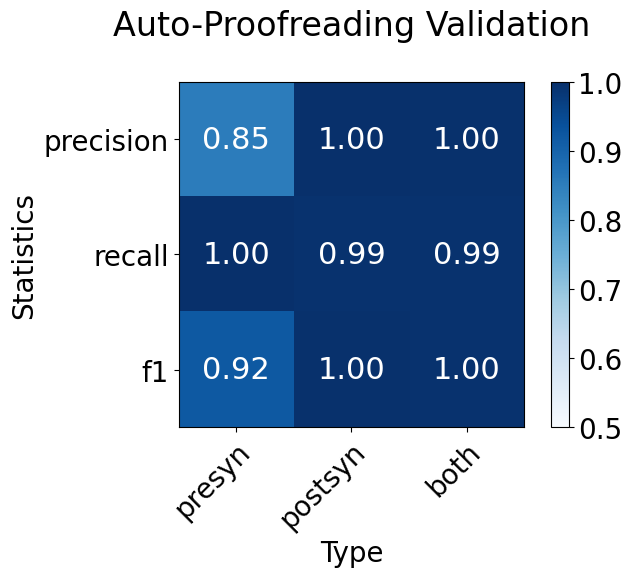

Segment Id = 864691136535575714
Postsyn counts:
TP:7041
TN:0
FP:6
FN:6
Presyn counts:
TP:0
TN:50
FP:0
FN:3


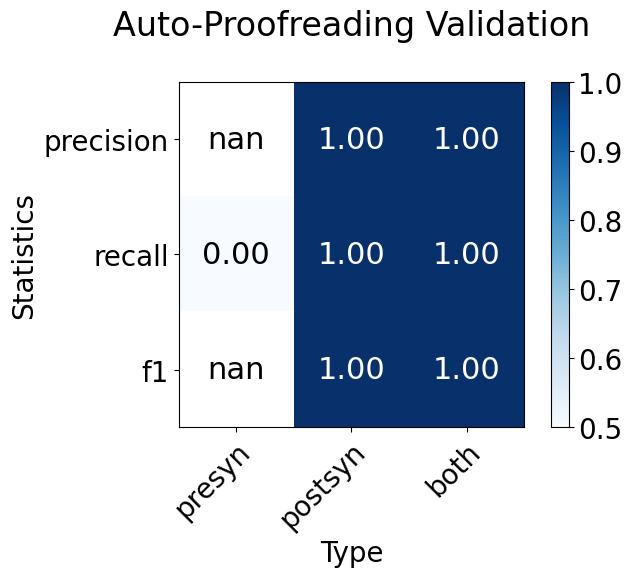

Segment Id = 864691135407289801
Postsyn counts:
TP:3325
TN:3
FP:4
FN:2
Presyn counts:
TP:0
TN:265
FP:0
FN:0


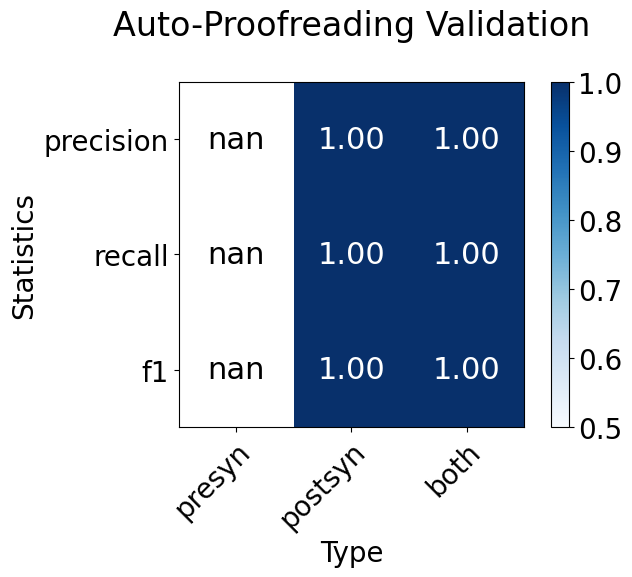

Segment Id = 864691135589907979
Postsyn counts:
TP:3887
TN:17
FP:4
FN:5
Presyn counts:
TP:38
TN:425
FP:16
FN:2


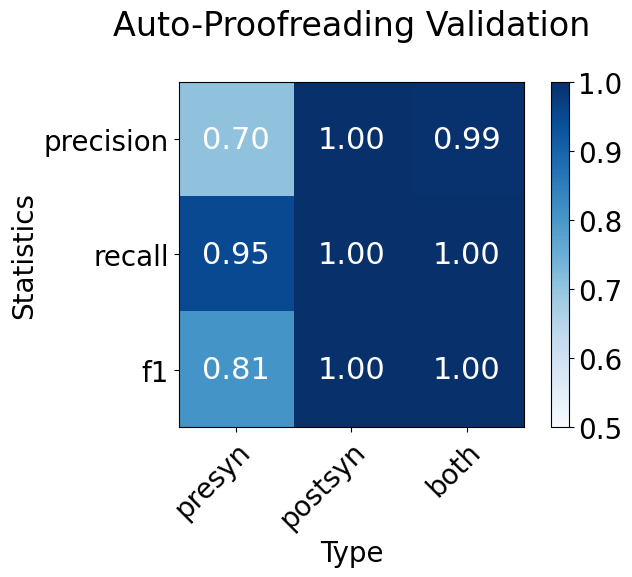

Segment Id = 864691135748575017
Postsyn counts:
TP:4524
TN:5
FP:0
FN:46
Presyn counts:
TP:12
TN:176
FP:6
FN:0


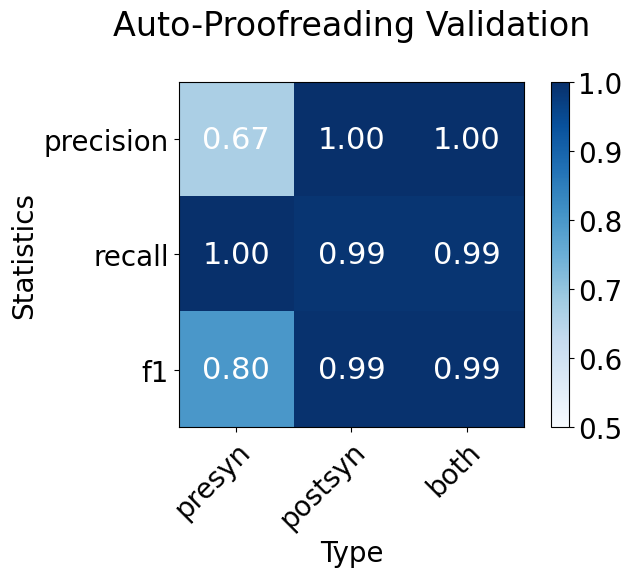

Segment Id = 864691136201041854
Postsyn counts:
TP:4630
TN:2
FP:2
FN:8
Presyn counts:
TP:5
TN:36
FP:1
FN:0


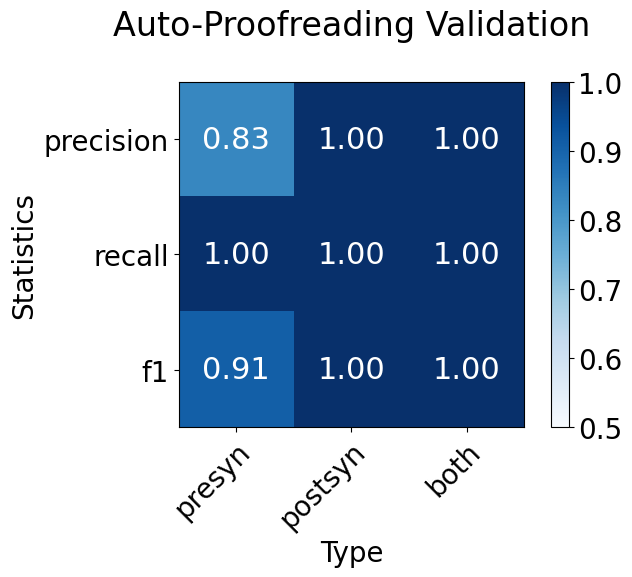

Segment Id = 864691136105484249
Postsyn counts:
TP:1724
TN:20
FP:2
FN:0
Presyn counts:
TP:10
TN:218
FP:0
FN:0


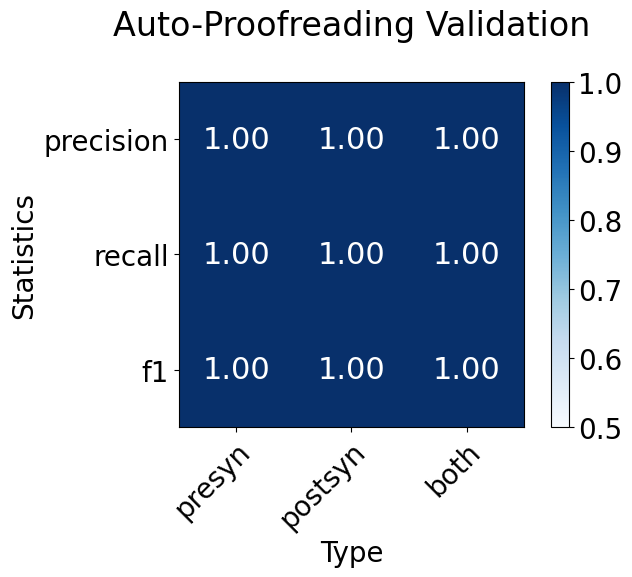

Segment Id = 864691135771629819
Postsyn counts:
TP:1465
TN:3
FP:2
FN:0
Presyn counts:
TP:56
TN:135
FP:25
FN:66


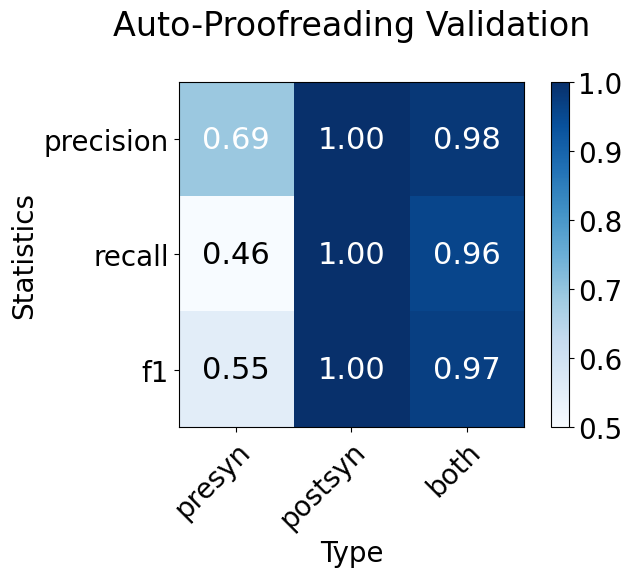

Segment Id = 864691135382947307
Postsyn counts:
TP:1624
TN:1
FP:0
FN:1009
Presyn counts:
TP:41
TN:20
FP:13
FN:4


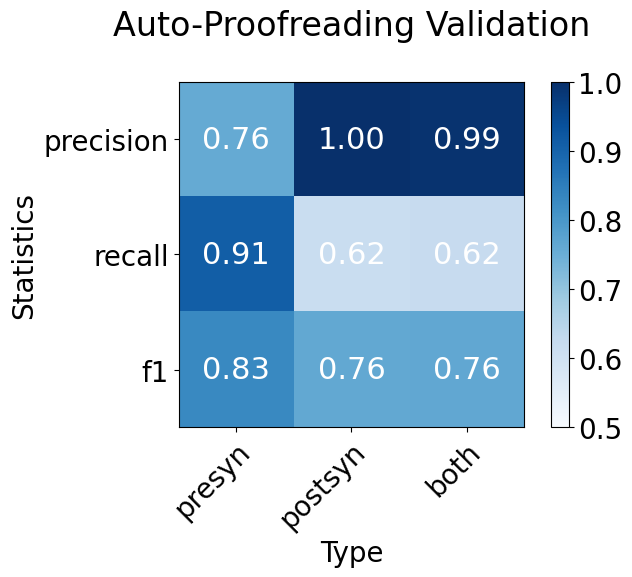

Segment Id = 864691136537477538
Postsyn counts:
TP:6628
TN:1
FP:11
FN:0
Presyn counts:
TP:33
TN:11
FP:2
FN:3


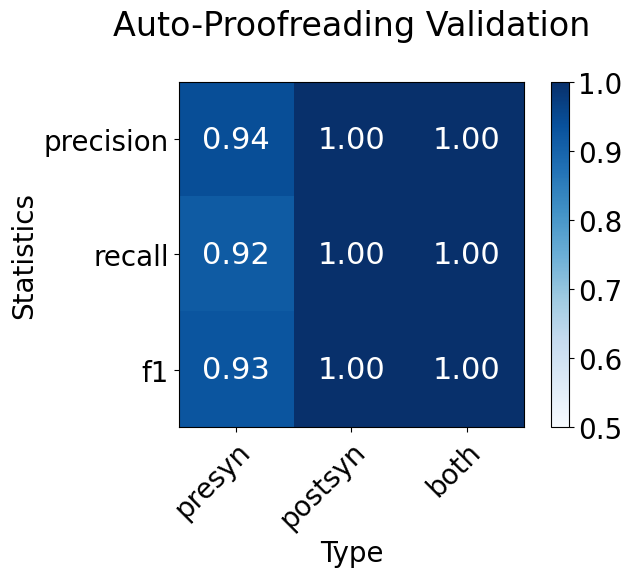

Segment Id = 864691135589906955
Postsyn counts:
TP:5681
TN:13
FP:17
FN:144
Presyn counts:
TP:7
TN:332
FP:10
FN:2


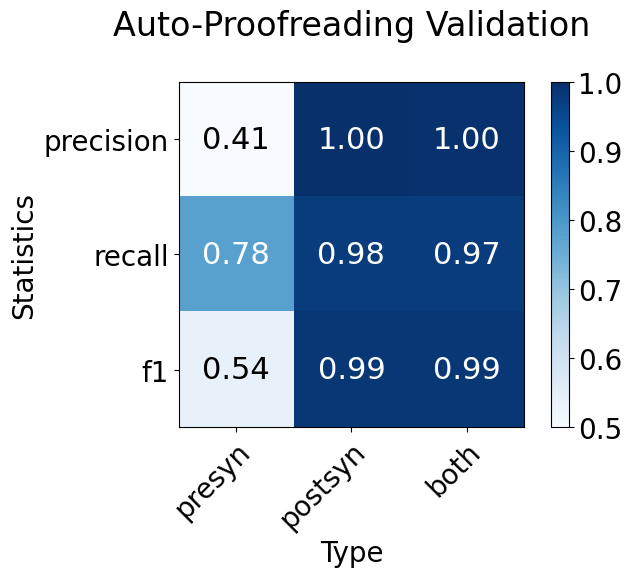

Segment Id = 864691136545546146
Postsyn counts:
TP:2833
TN:0
FP:1
FN:21
Presyn counts:
TP:19
TN:0
FP:0
FN:0


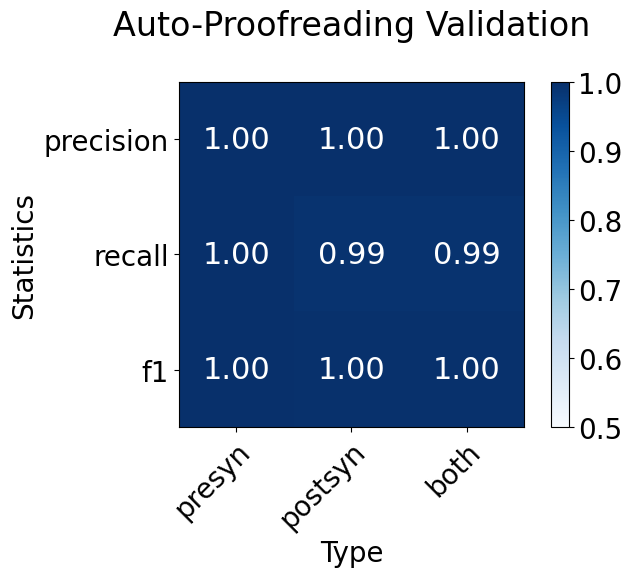

Segment Id = 864691136194103510
Postsyn counts:
TP:2991
TN:2
FP:0
FN:2
Presyn counts:
TP:91
TN:211
FP:30
FN:8


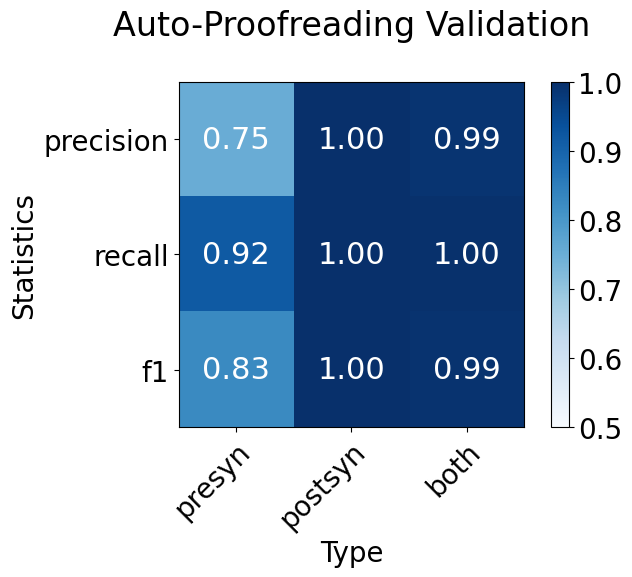

Segment Id = 864691135699269154
Postsyn counts:
TP:4540
TN:13
FP:12
FN:33
Presyn counts:
TP:0
TN:137
FP:0
FN:11


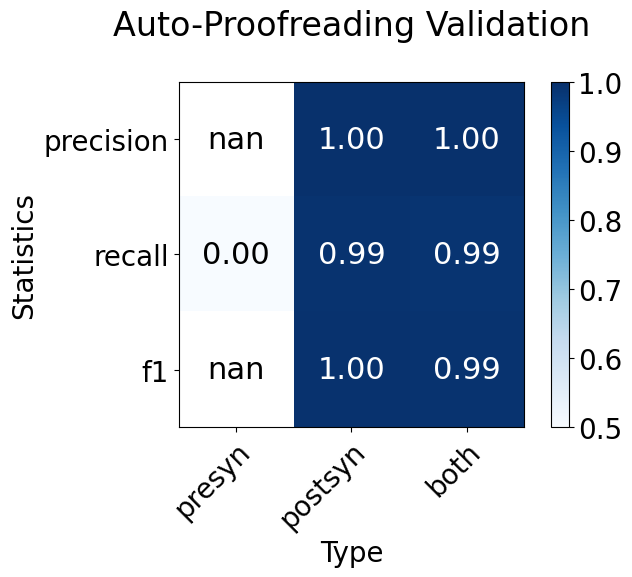

Segment Id = 864691136105491417
Postsyn counts:
TP:2011
TN:2
FP:1
FN:3
Presyn counts:
TP:1
TN:138
FP:1
FN:0


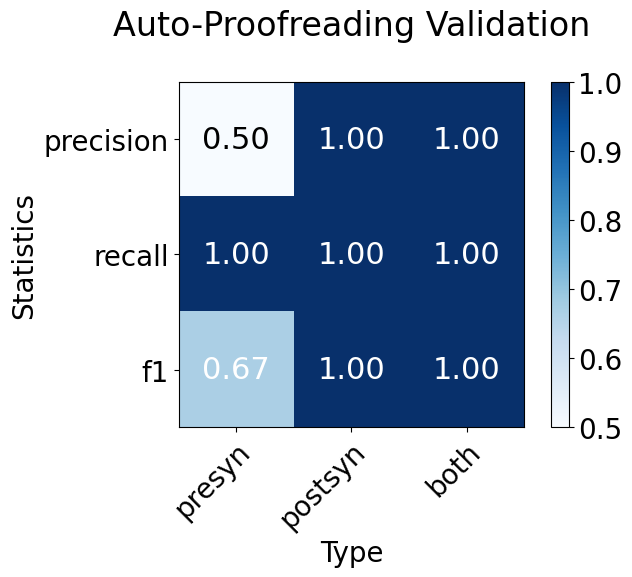

Segment Id = 864691135212690816
Postsyn counts:
TP:2333
TN:2
FP:0
FN:1
Presyn counts:
TP:0
TN:31
FP:0
FN:0


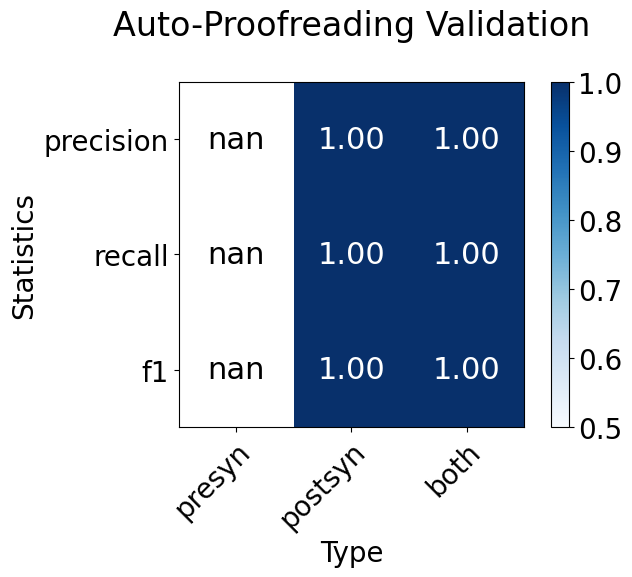

Segment Id = 864691136311791677
Postsyn counts:
TP:6853
TN:33
FP:8
FN:119
Presyn counts:
TP:0
TN:296
FP:0
FN:117


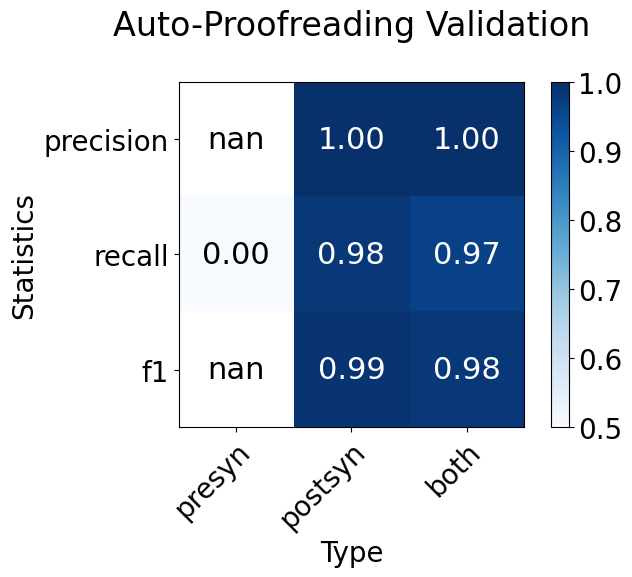

Segment Id = 864691135736387732
Postsyn counts:
TP:4153
TN:4
FP:2
FN:17
Presyn counts:
TP:4
TN:148
FP:1
FN:24


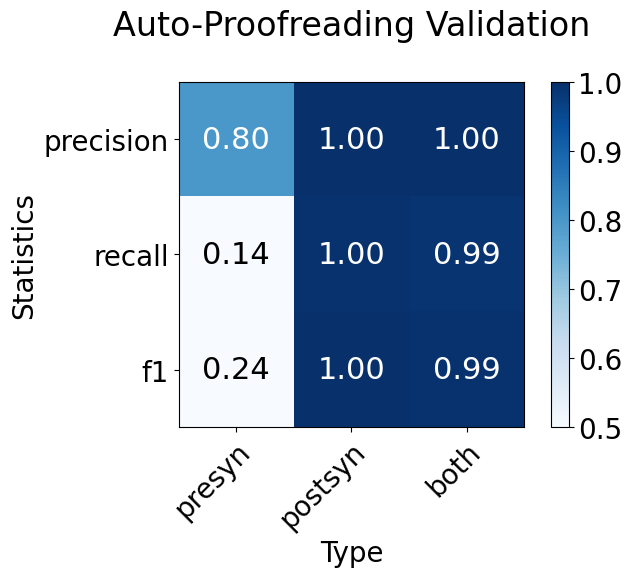

Segment Id = 864691135113167769
Postsyn counts:
TP:2212
TN:9
FP:5
FN:29
Presyn counts:
TP:0
TN:169
FP:0
FN:9


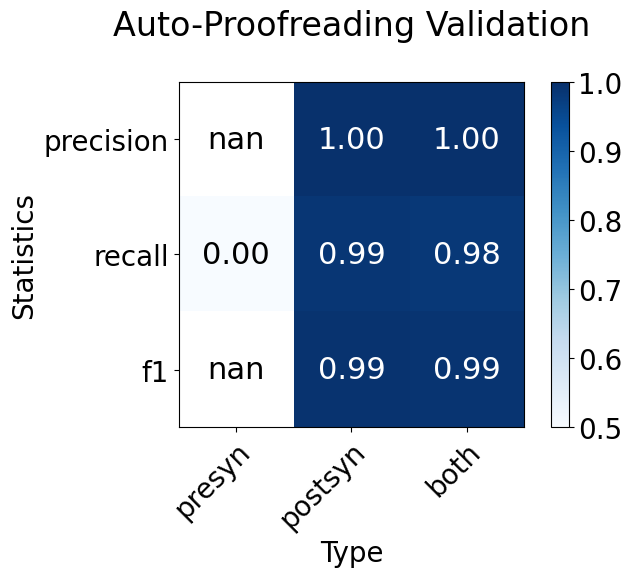

Segment Id = 864691136311740477
Postsyn counts:
TP:3018
TN:6
FP:3
FN:72
Presyn counts:
TP:0
TN:209
FP:0
FN:2


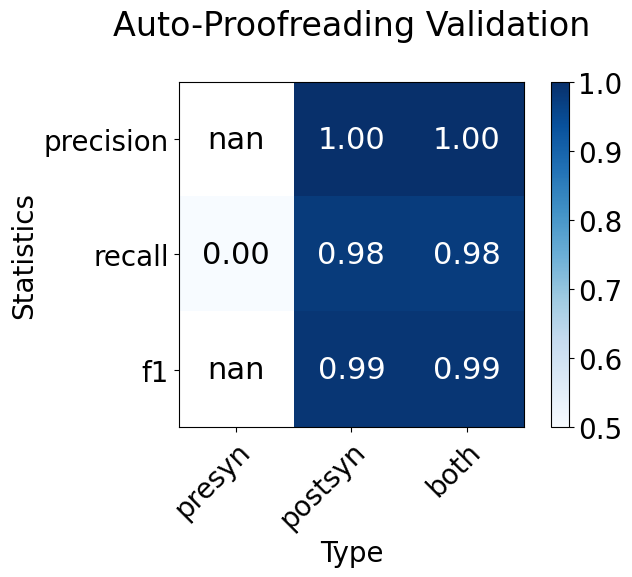

Segment Id = 864691136099807093
Postsyn counts:
TP:4805
TN:0
FP:12
FN:2
Presyn counts:
TP:2
TN:9
FP:0
FN:0


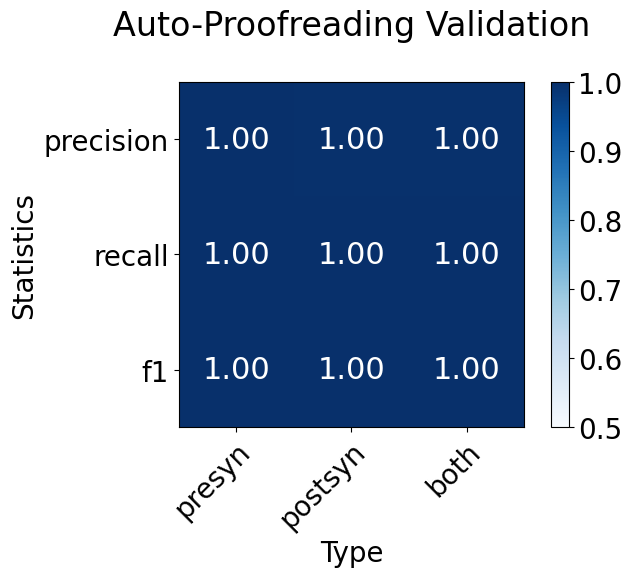

Segment Id = 864691135974454895
Postsyn counts:
TP:4317
TN:0
FP:0
FN:25
Presyn counts:
TP:0
TN:137
FP:0
FN:142


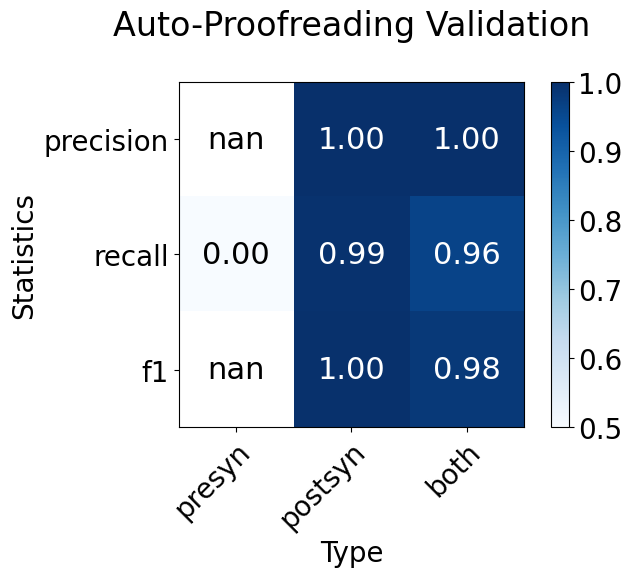

Segment Id = 864691135735426708
Postsyn counts:
TP:2651
TN:777
FP:2
FN:23
Presyn counts:
TP:58
TN:158
FP:2
FN:11


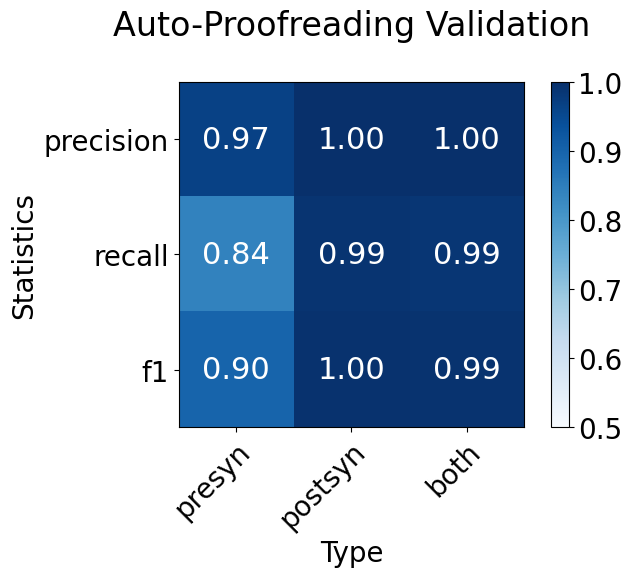

Segment Id = 864691135866394390
Postsyn counts:
TP:9288
TN:4
FP:3
FN:16
Presyn counts:
TP:203
TN:402
FP:88
FN:126


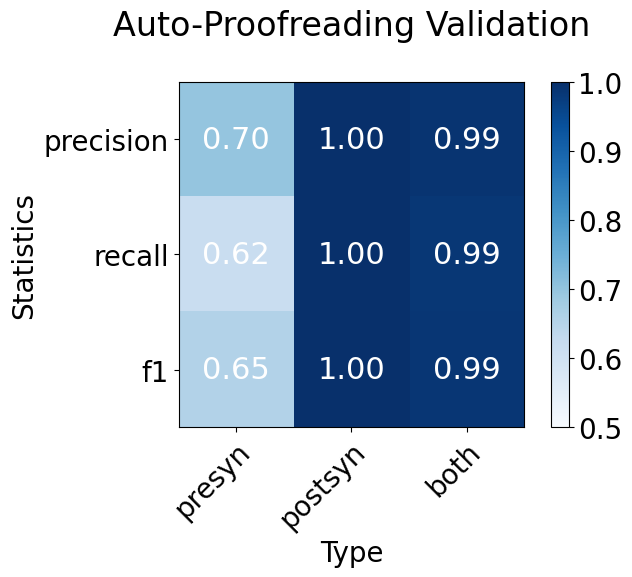

Segment Id = 864691136618403213
Postsyn counts:
TP:3079
TN:1
FP:2
FN:1
Presyn counts:
TP:17
TN:75
FP:0
FN:0


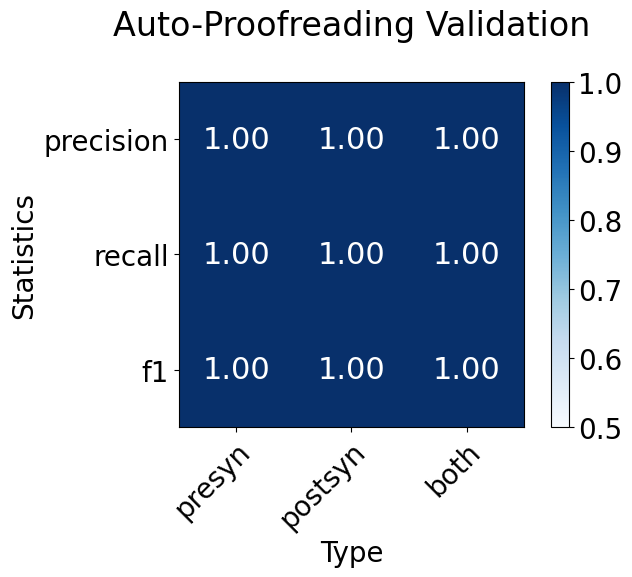

In [23]:
for v in val_df:
    vu.synapse_validation_df_to_score_plot(v)

In [38]:
bad_neurons = []
for v in val_df:
    s_dict = vu.synapse_validation_df_to_category_counts(v)["presyn"]
    seg_id = vu.validation_df_to_old_segment_id(v)
    FP_score = s_dict['FP']
    FN_score = s_dict['FN']
    #print(f"{seg_id}: FP = {FP_score}, FN = {FN_score}")
    print(f"{seg_id}: {s_dict}")
    if FP_score > 80 or FN_score > 80:
        bad_neurons.append(seg_id)

864691135491233631: {'TP': 13, 'TN': 140, 'FP': 0, 'FN': 0}
864691136370815112: {'TP': 6, 'TN': 3, 'FP': 4, 'FN': 1}
864691135974454639: {'TP': 2, 'TN': 108, 'FP': 0, 'FN': 0}
864691135925564174: {'TP': 7, 'TN': 82, 'FP': 1, 'FN': 1}
864691135348272855: {'TP': 0, 'TN': 387, 'FP': 0, 'FN': 48}
864691136333790899: {'TP': 72, 'TN': 91, 'FP': 25, 'FN': 4}
864691135740225387: {'TP': 7, 'TN': 403, 'FP': 0, 'FN': 25}
864691136333776819: {'TP': 7, 'TN': 14, 'FP': 0, 'FN': 0}
864691135564655959: {'TP': 6, 'TN': 69, 'FP': 0, 'FN': 5}
864691135272164113: {'TP': 31, 'TN': 153, 'FP': 0, 'FN': 0}
864691136105498585: {'TP': 210, 'TN': 0, 'FP': 4, 'FN': 25}
864691136008573614: {'TP': 8, 'TN': 68, 'FP': 0, 'FN': 37}
864691136175008774: {'TP': 105, 'TN': 145, 'FP': 15, 'FN': 0}
864691135645592260: {'TP': 28, 'TN': 109, 'FP': 4, 'FN': 7}
864691136618412685: {'TP': 23, 'TN': 95, 'FP': 4, 'FN': 0}
864691136535575714: {'TP': 0, 'TN': 50, 'FP': 0, 'FN': 3}
864691135945413668: {'TP': 0, 'TN': 99, 'FP': 0, 'FN

In [30]:
s_dict

{'presyn': {'TP': 13, 'TN': 140, 'FP': 0, 'FN': 0},
 'postsyn': {'TP': 749, 'TN': 1, 'FP': 4, 'FN': 3}}